In [2]:
binary_dict = {0: 'No triangle', 1 : 'Bias triangle'}

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pickle
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, regularizers
from tensorflow import keras as k
import random
from tqdm import tqdm
import shutil
import datetime, os
tf.random.set_seed(1)

cwd = os.getcwd()
primary_dir = os.fsencode(cwd)



shutil.rmtree("/Users/joshking/Dropbox/Quantum/logs")
logs_base_dir = "/Users/joshking/Dropbox/Quantum/logs"
os.makedirs(logs_base_dir, exist_ok=True)

%reload_ext tensorboard
%tensorboard --logdir {logs_base_dir}

tensorboard_callback = k.callbacks.TensorBoard(log_dir=logs_base_dir,update_freq='epoch',embeddings_freq=0,
                                               profile_batch = 0)
writer = tf.summary.create_file_writer("C:/Quantum/Seb_CNN/logs")

In [5]:
def create_model(pixel_size=32,dense_layers = [32*2,32],drop_out=0.4,l2=0.0001):
    model = models.Sequential()
    model.add(layers.Conv2D(pixel_size, (3, 3), activation='relu', input_shape=(pixel_size, pixel_size, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(pixel_size*2, (3, 3), activation='relu'))
#     model.add(layers.MaxPooling2D((2, 2)))
#     model.add(layers.Conv2D(pixel_size*2, (3, 3), activation='relu'))
    
    model.add(layers.Flatten())
  
    for dense_layer in dense_layers:
        model.add(layers.Dense(dense_layer, activation='elu',kernel_regularizer=regularizers.l2(l2)))
        model.add(layers.Dropout(drop_out))
    
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

def compile_model(model):
    model.compile(optimizer='adam',
             loss='binary_crossentropy',
              metrics=['accuracy'])
    return model

def train_model(model,train_images,train_labels,test_images,test_labels,epochs,batch_size):
    history = model.fit(train_images,train_labels,shuffle=True, epochs=epochs, batch_size=batch_size, 
                        validation_data=(test_images,test_labels),callbacks=[tensorboard_callback])
    return model, history

def evaluate_model(model,history, test_images,test_labels):
    plt.clf()
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.0, 1.1])
    plt.legend(loc='lower right')
    plt.show()
    
    test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
    return test_loss, test_acc

def normalise(x, y):
    x = tf.image.per_image_standardization(x)
    return x, y

#help(layers.Conv2D)

In [6]:
data_total = np.load('/Users/joshking/Dropbox/Quantum/Triangles/normalised_data_matrices_train.npy')
labels_total = np.load('/Users/joshking/Dropbox/Quantum/Triangles/normalised_data_labels_train.npy')


data_total,labels_total = normalise(data_total,labels_total) 

val_split = 0.2
val_set = np.int(val_split*np.shape(labels_total)[0])

train_images= np.array(data_total[val_set:]).reshape(-1, 32, 32, 1)
train_labels = np.array(labels_total[val_set:]).reshape(-1, 1)
validate_images = np.array(data_total[:val_set]).reshape(-1, 32, 32, 1)
validate_labels = np.array(labels_total[:val_set]).reshape(-1, 1)

# print(validate_labels.shape)

train_images_squeeze=np.squeeze(train_images.copy())
train_labels_squeeze=np.squeeze(train_labels.copy())
validate_images_squeeze=np.squeeze(validate_images.copy())
validate_labels_squeeze=np.squeeze(validate_labels.copy())

# print(validate_labels_squeeze.shape)

positives_train_X = np.zeros(shape=(len(train_images),32,32,1))
j=0
for i in range(len(train_labels)):
    if train_labels[i]==1:
        positives_train_X[j] = train_images[i]
        j +=1
positives_train_X_2= np.delete(positives_train_X.copy(), np.s_[2545:], 0)

doubled_positives_train_X_2=np.concatenate((positives_train_X_2,positives_train_X_2), axis=0)
doubled_positives_train_Y = np.ones(shape=(len(doubled_positives_train_X_2),1),dtype=int)
# print(doubled_positives_train_X_2.shape)
print((len(doubled_positives_train_X_2)))
print(doubled_positives_train_Y.shape)
print(train_labels.shape)

extra_train_images=np.concatenate((train_images.copy(),doubled_positives_train_X_2.copy()),axis=0)
extra_train_labels=np.concatenate((train_labels.copy(),doubled_positives_train_Y.copy()),axis=0)

print(extra_train_images.shape)
print(extra_train_labels.shape)

# print(train_labels[-20:])
# print(extra_train_labels[-20:])

print

Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
5090
(5090, 1)
(13057, 1)
(18147, 32, 32, 1)
(18147, 1)


In [68]:
import random
import numpy as np
def myfunction():
    return 0.2

z=np.arange(len(extra_train_images))
random.shuffle(z,myfunction)
print(z[:10])

extra_train_images_copy=extra_train_images.copy()
extra_train_images_shuffle=extra_train_images.copy()

extra_train_labels_copy=extra_train_labels.copy()
extra_train_labels_shuffle=extra_train_labels.copy()

for i in range(len(extra_train_images)):
    extra_train_images_shuffle[i]=extra_train_images_copy[z[i]]
    extra_train_labels_shuffle[i]=extra_train_labels_copy[z[i]]   
print(extra_train_images_shuffle.shape)


# fig2=plt.figure(figsize=(8, 8))
# columns = 1
# rows = 10
# for i in range(1, columns*rows +1):
#     img = extra_train_images[i+3000].squeeze()
#     fig2.add_subplot(rows,1, i)
#     plt.imshow(img)
# fig1=plt.figure(figsize=(8, 8))
# columns = 1
# rows = 10
# for i in range(1, columns*rows +1):
#     img = extra_train_images_shuffle[i+3000].squeeze()
#     fig1.add_subplot(rows,1, i)
#     plt.imshow(img)
# plt.show()
# print(extra_train_labels[-20:])
# print(extra_train_labels_shuffle[-20:])
# print(sum(extra_train_labels)/len(extra_train_labels))
# print(sum(train_labels)/len(train_labels))

[11719  5469  8594     0 14844 17969  4219  4844     1  6094]
(18147, 32, 32, 1)


In [ ]:
#Recursive plotter (?):
# w=2
# h=10
# fig=plt.figure()
# for i in range(1,20):
#     img = train_images[i].squeeze()
#     fig.add_subplot(i,2,1)
#     plt.imshow(img)
# plt.show()


In [69]:
def model_main(pixel_size=32,drop_out=0.4,l2=0.0001,epochs = 10,batch_size = 100):
    print('Trained on '+str(len(train_labels)))
    print('Validated on '+str(len(validate_labels)))

    model_binary_classifier = create_model(pixel_size=pixel_size,drop_out=drop_out,l2=l2)
    model_binary_classifier.summary()
    model_binary_classifier = compile_model(model_binary_classifier)

    val_loss, val_acc = train_model(model_binary_classifier,extra_train_images_shuffle,extra_train_labels_shuffle,
                                    validate_images,validate_labels,epochs,batch_size)
    
    true_positive = []
    false_positive = []
    true_negative = []
    false_negative = []
    for i in tqdm(range(len(validate_labels))):
            label = validate_labels[i][0]
            prediction = model_binary_classifier.predict(validate_images[i:i+1])
            if (prediction > 0.5):
                prediction = 1
            else:
                prediction = 0
            if (prediction == label):
                if (label == 1):
                    true_positive.append(validate_images[i:i+1])
                    prnt = "True positive"
                else:
                    true_negative.append(validate_images[i:i+1])
                    prnt = "True negative"
            else:
                if (label == 1):
                    false_negative.append(validate_images[i:i+1])
                    prnt = "False negative"
                else:
                    false_positive.append(validate_images[i:i+1])
                    prnt = "False positive"
            if (i<5):
                print('------------------------------------------')
                print(prnt)
                print('Label = ', binary_dict[label]," = ", label)
                print('prediction = ', prediction)
                plt.clf()
                plt.imshow(validate_images[i][:,:,0])
                plt.show()
        
    n_true_positive = np.shape(true_positive)[0]
    n_false_positive = np.shape(false_positive)[0]
    n_true_negative = np.shape(true_negative)[0]
    n_false_negative = np.shape(false_negative)[0]
    
    total_test = n_true_positive + n_false_positive + n_true_negative + n_false_negative

    percent_true_positive = 100 * n_true_positive/total_test
    percent_false_positive = 100 *n_false_positive/total_test
    percent_true_negative = 100 *n_true_negative/total_test
    percent_false_negative = 100 *n_false_negative/total_test

    return model_binary_classifier,percent_true_positive,percent_false_positive,percent_true_negative,percent_false_negative

l2 = np.logspace(-7,0,7)
n_true_positive,n_false_positive,n_true_negative,n_false_negative = np.zeros_like(l2),np.zeros_like(l2),np.zeros_like(l2),np.zeros_like(l2)
print(n_true_positive)
index = 0
#n_true_positive[index], n_false_positive[index],n_true_negative[index],n_false_negative[index] = model_main(item)

pixel_size = 32
drop_out = 0.4

for index,item in enumerate(l2):
    model_binary_classifier,n_true_positive[index], n_false_positive[index],n_true_negative[index],n_false_negative[index] = model_main(pixel_size,drop_out,item)

Trained on 13057
Validated on 3264
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
flatten_1 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                692288    
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)    

  0%|          | 0/3264 [00:00<?, ?it/s]

------------------------------------------
True negative
Label =  No triangle  =  0
prediction =  0


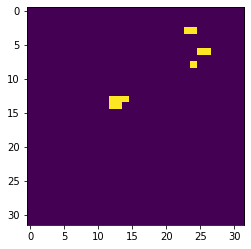

  0%|          | 1/3264 [00:00<16:12,  3.36it/s]

------------------------------------------
True negative
Label =  No triangle  =  0
prediction =  0


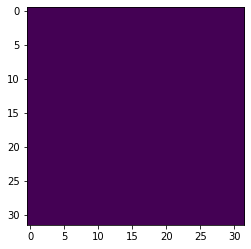

  0%|          | 2/3264 [00:00<14:41,  3.70it/s]

------------------------------------------
True negative
Label =  No triangle  =  0
prediction =  0


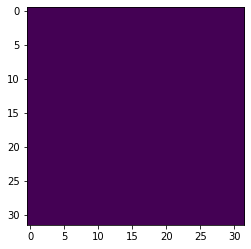

  0%|          | 3/3264 [00:00<13:53,  3.91it/s]

------------------------------------------
True negative
Label =  No triangle  =  0
prediction =  0


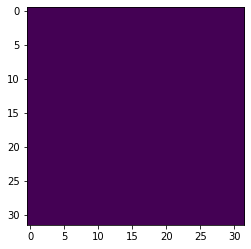

  0%|          | 4/3264 [00:00<13:00,  4.18it/s]

------------------------------------------
True negative
Label =  No triangle  =  0
prediction =  0


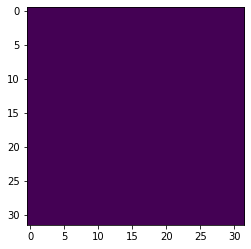

100%|██████████| 3264/3264 [02:02<00:00, 26.66it/s]


In [70]:
model_binary_classifier,n_true_positive, n_false_positive,n_true_negative,n_false_negative = model_main()

plt.plot(np.linspace(-7,0,7),n_true_positive,label='true_positive')
plt.plot(np.linspace(-7,0,7),n_false_positive,label='false_positive')
plt.plot(np.linspace(-7,0,7),n_true_negative,label='true_negative')
plt.plot(np.linspace(-7,0,7),n_false_negative,label='false_negative')
plt.xlabel('log( L2 )')
plt.ylabel('Percentage (%)')
plt.legend()
plt.show()

In [71]:
cwd = os.chdir(primary_dir)
model_binary_classifier.save('/Users/joshking/Dropbox/Quantum/bias_triangle_binary_classifier.h5') 

In [72]:
print('Percent true positive  ',n_true_positive,'%')
print('Percent false positive  ',n_false_positive,'%')
print('Percent true negative  ',n_true_negative,'%')
print('Percent false negative  ',n_false_negative,'%')
print('Percent Total True   ',(n_true_positive + n_true_negative),'%')

Percent true positive   12.10171568627451 %
Percent false positive   1.286764705882353 %
Percent true negative   80.02450980392157 %
Percent false negative   6.5870098039215685 %
Percent Total True    92.12622549019608 %


In [ ]:
#help(k.callbacks.TensorBoard)

In [ ]:
n_true_positive + n_true_negative
